<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/convnet_cats_%26_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Convolutional Neural Network to identify cats versus dogs (Kaggle competition)**

*Data source:* 
https://www.kaggle.com/c/dogs-vs-cats/data

*Reference: Chollet 5.2.2*

Instructions: Download Kaggle data and copy and paste into "cats_and_dogs_all" after running section 2 which generates the directories

**1. Import libraries**

In [0]:
# Import library
import os, shutil
print('Operating system: ', os.name)
print('Get current working directory: ', os.getcwd()) 

Operating system:  posix
Get current working directory:  /content


**2. Create directories for data**

In [0]:
# Create directory for raw data
top_dir = '/content'
full_kaggle_dir =  os.path.join(top_dir, 'cats_and_dogs_all')
os.mkdir(full_kaggle_dir)

# Create directory for train, test, split
base_dir = '/content/cats_and_dogs_subset'
os.mkdir(base_dir)

# Create sub directories for train, test, split
# Training
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# Validating
validation_dir =  os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# Testing
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create directories for assigning cat images and dog images
# Train
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Testing
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

**3. Import data and assign to folders**

In [0]:
# Copies images to assigned folders

# Cats / Training
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 500)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

# Cats / Validation
fnames = ['cat.{}.jpg'.format(i) for i in range(501, 700)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

# Cats / Testing
fnames = ['cat.{}.jpg'.format(i) for i in range(701, 999)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# Dogs / Training
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 500)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

# Dogs / Validation
fnames = ['dog.{}.jpg'.format(i) for i in range(501, 700)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

# Dogs / Testing
fnames = ['dog.{}.jpg'.format(i) for i in range(701, 999)]
for fname in fnames:
  src = os.path.join(full_kaggle_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Review files

# Training
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

# Validation
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

# Testing
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 499
total training dog images: 499
total validation cat images: 199
total validation dog images: 199
total test cat images: 298
total test dog images: 298


**4. Instantiating convnet (for cat versus dog classification)**

*This is a balanced binary classification problem and so we'll use classification accuracy as an appropiate measure of success. We'll use a stack of alternating Conv2D and MaxPooling2D layers. Note how the depth of the feature maps will increase in the network but the size of the features decreases - this seems common to convnets. Since this is a binary classification problem then we'll end with a sinlge Dense layer of size 1 with a sigmoid activation to give a 'probability' that the network is looking at one class as compared to the other*

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

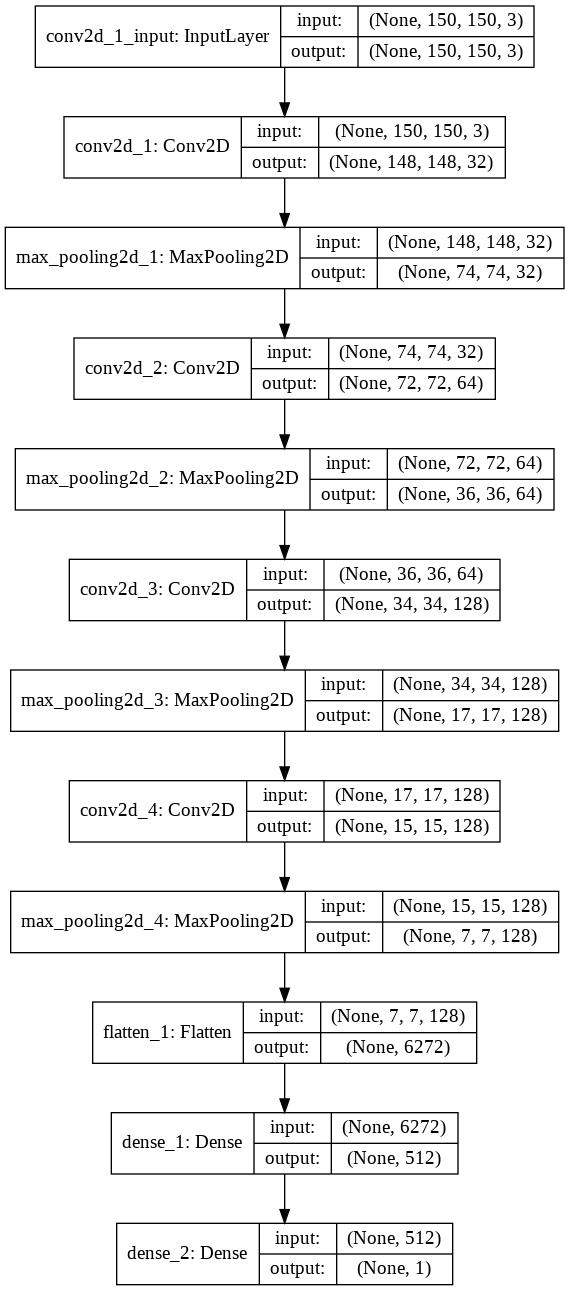

In [0]:
# Plot model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**5. Configuring the model ready for training**

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

**6. Data preprocessing**

*Transforming data into floating point tensors to feed network from JPEG format to RGB grid of pixels and rescale from [0, 255] to [0, 1]*

*Use ImageDataGenerator class to turn images into preprocessed tenors*

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

Found 998 images belonging to 2 classes.
Found 398 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
# Fitting model using a batch generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6869 - acc: 0.5446 - val_loss: 0.7406 - val_acc: 0.5271
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.6348 - acc: 0.6373 - val_loss: 0.5901 - val_acc: 0.5966
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.5795 - acc: 0.7069 - val_loss: 0.6497 - val_acc: 0.5994
Epoch 4/30
100/100 [==============================] - 103s 1s/step - loss: 0.5159 - acc: 0.7455 - val_loss: 0.7458 - val_acc: 0.6539
Epoch 5/30
100/100 [==============================] - 104s 1s/step - loss: 0.4600 - acc: 0.7821 - val_loss: 0.6905 - val_acc: 0.6566
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.4076 - acc: 0.8206 - val_loss: 0.5435 - val_acc: 0.6761
Epoch 7/30
100/100 [==============================] - 104s 1s/step - loss: 0.3666 - acc: 0.8477 - val_loss: 0.7563 - val_acc: 0.6466
Epoch 8/30
100/100 [==============================] - 104s 1s/step - 

In [0]:
# Save model after training
model.save('cats_and_dogs_small_1.h5')

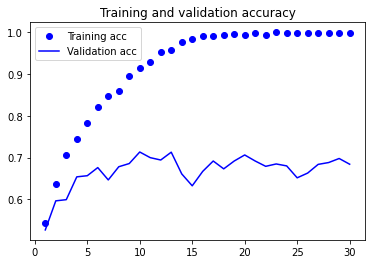

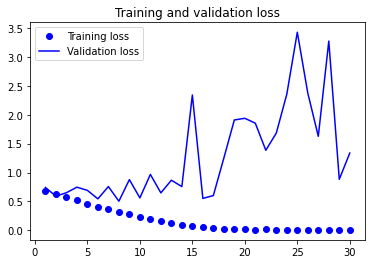

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# model.predict('history[1]')
data_batch[1][1][1][1]

NameError: ignored

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x280 at 0x7F6E3564F518>


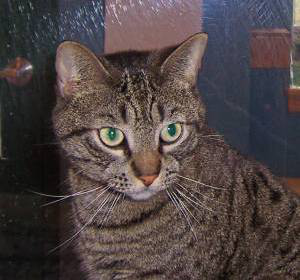

In [0]:
# Check an image (using Pillow)

from PIL import Image 
show_image = Image.open('cat.1.jpg')
print(show_image)
show_image

[[[ 39  44  40]
  [ 39  44  40]
  [ 40  44  43]
  ...
  [207 204 171]
  [202 199 164]
  [201 199 161]]

 [[ 40  45  41]
  [ 40  45  41]
  [ 40  44  43]
  ...
  [203 200 169]
  [199 196 161]
  [197 195 157]]]


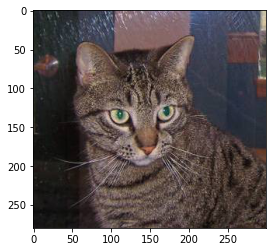

In [0]:
# Check an image (using Matplotlib)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cat.1.jpg')
print(img[0:2])

show_the_image = plt.imshow(img)